------------Start optimization of Least Squares------------
Starting Gradient Descent with initial guess: [1. 1.]
Gradient Descent Converged after 48 iterations.
initial_guess Entering into Newton: [0.78534387 1.50735738]
newton_method Converged after 118 iterations.
Optimal w (Least Squares): [-0.04196111  3.05741168]


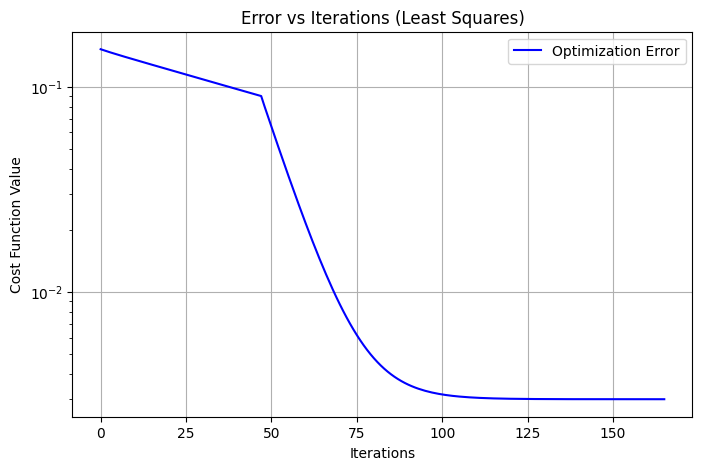

----------Start optimization of Logistic Regression------------
Starting Gradient Descent with initial guess: [1. 1.]
Gradient Descent Did Not Converge
initial_guess Entering into Newton: [-6.82689616 13.84247217]
Error: Division by zero or singular Hessian.
Optimal w (Logistic Regression): None


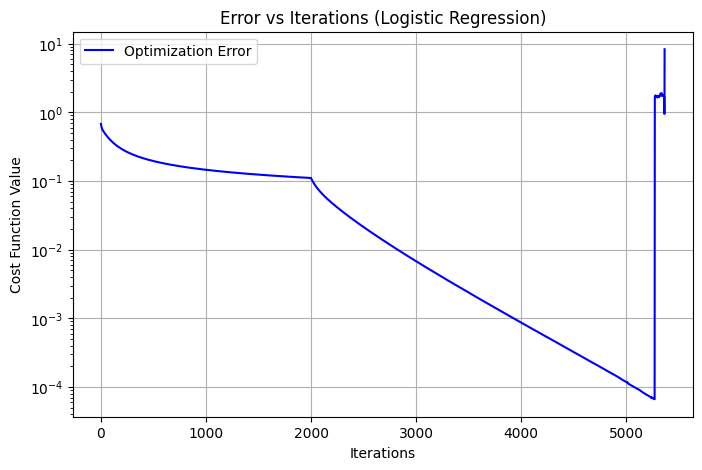

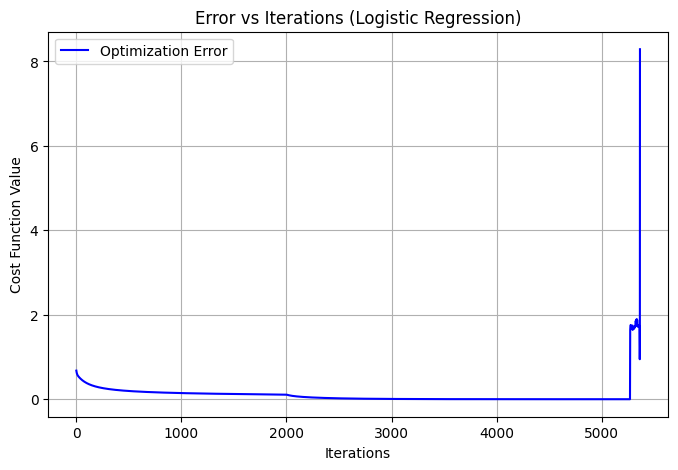

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_cost(w, X, y):
    m = len(y)
    predictions = X @ w
    return (1 / (2 * m)) * np.sum((y - predictions) ** 2)

def logistic_cost(w, X, y):
    m = len(y)
    predictions = 1 / (1 + np.exp(-X @ w))
    predictions = np.clip(predictions, 1e-6, 1 - 1e-6)  # Prevent log(0)
    return (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

def derivative(f, w, X, y):
    h = 1e-6
    grad = np.zeros_like(w)
    for i in range(len(w)):
        w_h = w.copy()
        w_h[i] += h
        grad[i] = (f(w_h, X, y) - f(w, X, y)) / h
    return grad

def GradientDescent(initial_w, f, X, y, learning_rate, tolr):
    print("Starting Gradient Descent with initial guess:", initial_w)
    tolerance = tolr
    max_iterations = 2000
    w = initial_w
    errors = []

    for i in range(max_iterations):
        grad = derivative(f, w, X, y)
        w = w - learning_rate * grad
        errors.append(f(w, X, y))  # Store cost at each iteration

        if np.linalg.norm(grad) < tolerance:
            print("Gradient Descent Converged after", i + 1, "iterations.")
            return w, errors
    
    print("Gradient Descent Did Not Converge")
    return w, errors

def newton_method(initial_w, f, X, y):
    print("initial_guess Entering into Newton:", initial_w)
    tolerance = 1e-4
    max_iterations = 10000
    w = initial_w
    errors = []

    for i in range(max_iterations):
        f_dash = derivative(f, w, X, y)
        f_double_dash = np.eye(len(w)) * derivative(lambda w, X, y: np.sum(derivative(f, w, X, y)), w, X, y)

        if np.linalg.det(f_double_dash) == 0:
            print("Error: Division by zero or singular Hessian.")
            return None, errors

        delta = np.linalg.inv(f_double_dash) @ f_dash
        w = w - delta
        errors.append(f(w, X, y))  # Store cost at each iteration

        if np.linalg.norm(delta) < tolerance:
            print("newton_method Converged after", i + 1, "iterations.")
            return w, errors
    
    print("newton_method Stopped after", max_iterations, "iterations.")
    return None, errors

def plot_error_semiog(errors, title):
    plt.figure(figsize=(8, 5))
    plt.semilogy(errors, label="Optimization Error", linestyle="-", color="b")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_error(errors, title):
    plt.figure(figsize=(8, 5))
    plt.plot(errors, label="Optimization Error", linestyle="-", color="b")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------- Least Squares Regression ---------------
print("------------Start optimization of Least Squares------------")
m = 20
X = np.random.rand(m, 1)
y = 3 * X.squeeze() + np.random.normal(0, 0.1, m)
X = np.c_[np.ones(m), X]

# Gradient Descent
initial_w, errors_gd_ls = GradientDescent(np.ones(2), least_squares_cost, X, y, learning_rate=0.1, tolr=0.1)

# Newton's Method
optimal_w_ls, errors_nm_ls = newton_method(initial_w, least_squares_cost, X, y)
print("Optimal w (Least Squares):", optimal_w_ls)

# Combine errors in one curve
if errors_nm_ls:
    errors_gd_ls.extend(errors_nm_ls)

# Plot Least Squares Regression Error vs Iterations
plot_error_semiog(errors_gd_ls, "Error vs Iterations (Least Squares)")

# ------------- Logistic Regression ---------------
print("----------Start optimization of Logistic Regression------------")
m = 20
X = np.random.rand(m, 1)
y = (X.squeeze() > 0.5).astype(int)  # Binary classification
X = np.c_[np.ones(m), X]  # Add bias term

# Gradient Descent
initial_w, errors_gd_log = GradientDescent(np.ones(2), logistic_cost, X, y, learning_rate=0.4, tolr=0.0001)

# Newton's Method
optimal_w_log, errors_nm_log = newton_method(initial_w, logistic_cost, X, y)
print("Optimal w (Logistic Regression):", optimal_w_log)

# Combine errors in one curve
if errors_nm_log:
    errors_gd_log.extend(errors_nm_log)

# Plot Logistic Regression Error vs Iterations
plot_error_semiog(errors_gd_log, "Error vs Iterations (Logistic Regression)")
plot_error(errors_gd_log, "Error vs Iterations (Logistic Regression)")

------------Start optimization of Least Squares------------
Starting Gradient Descent with initial guess: [1. 1.]
Gradient Descent Converged after 889 iterations.
Gradient Descent Final Error: 0.006694664884747837


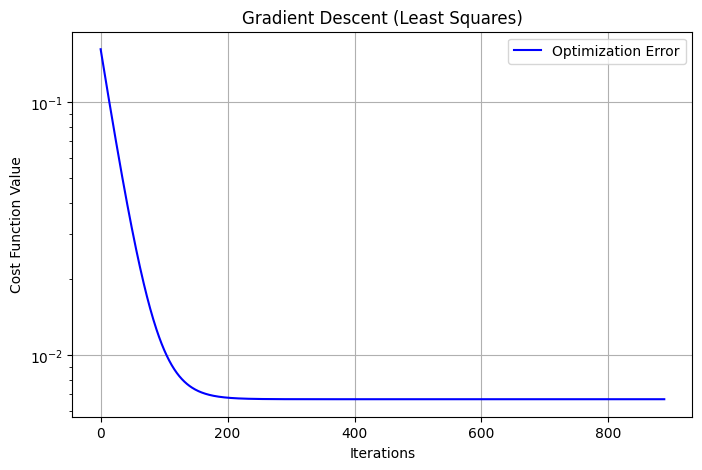

Starting Newton's Method with initial guess: [1. 1.]
[ 0.07395978 -0.12019618]
[[1.45833345 0.        ]
 [0.         0.74337758]]
[ 0.09735238 -0.09735425]
[[1.4585555  0.        ]
 [0.         0.74343309]]
[ 0.09062666 -0.09062066]
[[1.45833345 0.        ]
 [0.         0.74343309]]
[ 0.08435136 -0.08435957]
[[1.4583057  0.        ]
 [0.         0.74340534]]
[ 0.07851993 -0.07852603]
[[1.45838897 0.        ]
 [0.         0.74343309]]
[ 0.07309196 -0.07309609]
[[1.45831958 0.        ]
 [0.         0.74334983]]
[ 0.06804092 -0.06804006]
[[1.45831958 0.        ]
 [0.         0.7433637 ]]
[ 0.06333525 -0.06333571]
[[1.45834733 0.        ]
 [0.         0.74328044]]
[ 0.058961   -0.05895314]
[[1.45831264 0.        ]
 [0.         0.7433637 ]]
[ 0.05487871 -0.0548794 ]
[[1.45825019 0.        ]
 [0.         0.74332901]]
[ 0.05108397 -0.0510844 ]
[[1.45828488 0.        ]
 [0.         0.74333595]]
[ 0.04755204 -0.0475517 ]
[[1.45835427 0.        ]
 [0.         0.7433984 ]]
[ 0.04426294 -0.0442643

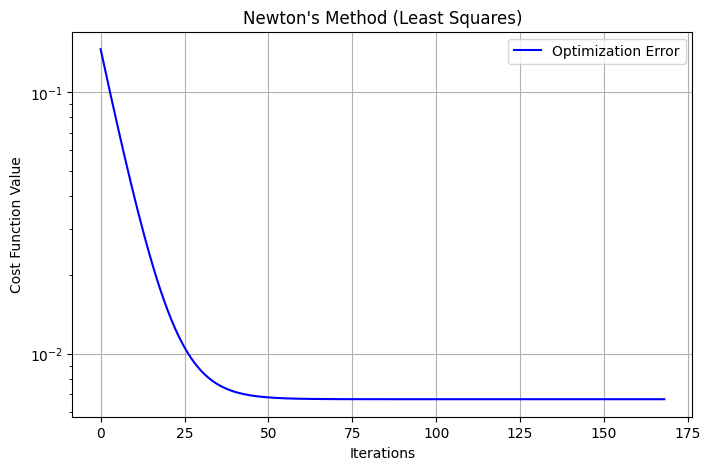

Starting Gradient Descent with initial guess: [1. 1.]
Gradient Descent Converged after 1614 iterations.
Gradient Descent Final Error: 0.006702732082396346
Starting Newton's Method with initial guess: [-0.00902956  3.0410959 ]
[ 0.0004362  -0.00089342]
[[1.45833606 0.        ]
 [0.         0.74336717]]
[ 0.00068794 -0.00068794]
[[1.45833606 0.        ]
 [0.         0.74335416]]
[ 0.00064038 -0.00064037]
[[1.45833692 0.        ]
 [0.         0.74337151]]
[ 0.00059609 -0.0005961 ]
[[1.45833519 0.        ]
 [0.         0.7433637 ]]
[ 0.00055488 -0.00055488]
[[1.45833519 0.        ]
 [0.         0.74336804]]
[ 0.00051651 -0.00051651]
[[1.45833953 0.        ]
 [0.         0.74336804]]
[ 0.00048079 -0.00048079]
[[1.45833606 0.        ]
 [0.         0.74336804]]
[ 0.00044755 -0.00044755]
[[1.45833432 0.        ]
 [0.         0.74336804]]
[ 0.0004166 -0.0004166]
[[1.45833345 0.        ]
 [0.         0.74336804]]
[ 0.00038779 -0.0003878 ]
[[1.45833172 0.        ]
 [0.         0.74336631]]
[ 0.00

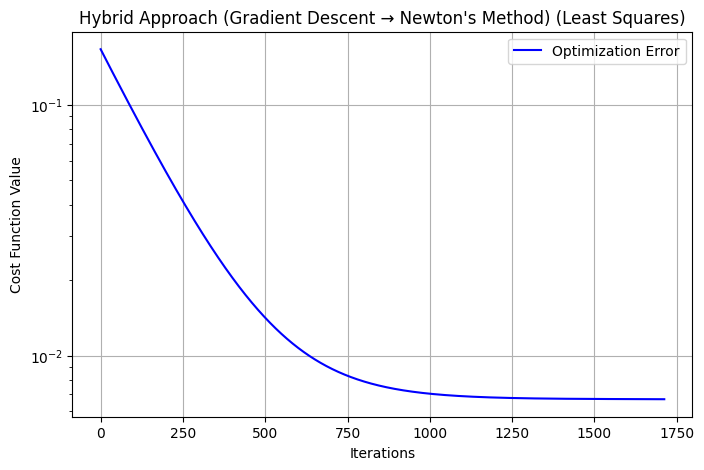

----------Start optimization of Logistic Regression------------
Starting Gradient Descent with initial guess: [1. 1.]
Gradient Descent Final Error: 0.014740109253674173


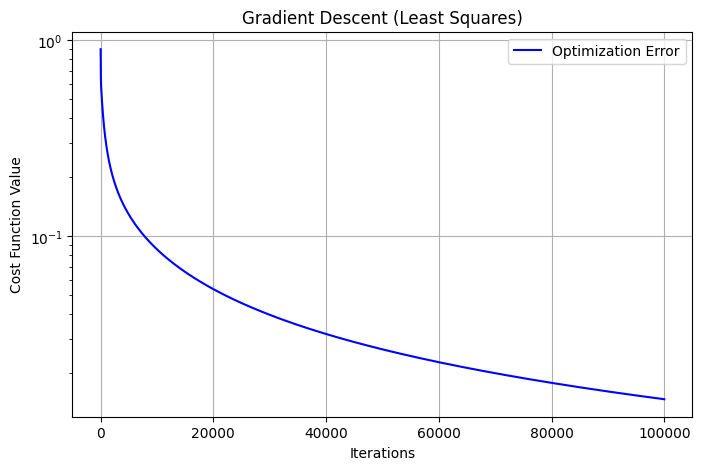

Starting Newton's Method with initial guess: [1. 1.]
[0.36203247 0.07315103]
[[0.21826985 0.        ]
 [0.         0.10635937]]
[-0.07404421 -0.14300918]
[[0.34883207 0.        ]
 [0.         0.1861844 ]]
[ 0.06871229 -0.06106986]
[[0.36248782 0.        ]
 [0.         0.19073632]]
[ 0.06007932 -0.06015072]
[[0.35915715 0.        ]
 [0.         0.18895996]]
[ 0.05674104 -0.05684237]
[[0.35316194 0.        ]
 [0.         0.18551827]]
[ 0.05368882 -0.05372474]
[[0.34738878 0.        ]
 [0.         0.1821876 ]]
[ 0.05086437 -0.0508196 ]
[[0.34072745 0.        ]
 [0.         0.17863488]]
[ 0.04820413 -0.04813668]
[[0.33462122 0.        ]
 [0.         0.17563728]]
[ 0.04570179 -0.04567106]
[[0.32723824 0.        ]
 [0.         0.17214008]]
[ 0.0433545  -0.04339168]
[[0.3205769  0.        ]
 [0.         0.16842083]]
[ 0.04127752 -0.04121823]
[[0.31369352 0.        ]
 [0.         0.16497914]]
[ 0.03928959 -0.03922951]
[[0.30753178 0.        ]
 [0.         0.16198154]]
[ 0.03743899 -0.03738849]

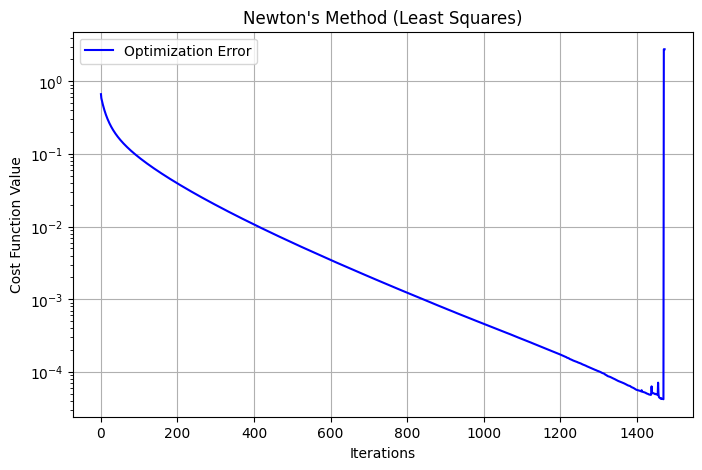

Starting Gradient Descent with initial guess: [1. 1.]
Gradient Descent Converged after 6466 iterations.
Gradient Descent Final Error: 0.11155804168772619
Starting Newton's Method with initial guess: [-7.31648348 13.61791819]
[ 0.00489514 -0.00871868]
[[0.12428947 0.        ]
 [0.         0.07040202]]
[ 0.00720638 -0.00726673]
[[0.1225825  0.        ]
 [0.         0.06906975]]
[ 0.0071479  -0.00715369]
[[0.12151391 0.        ]
 [0.         0.06833423]]
[ 0.00706583 -0.00705697]
[[0.1205841  0.        ]
 [0.         0.06794565]]
[ 0.00696806 -0.00697254]
[[0.11959878 0.        ]
 [0.         0.06740442]]
[ 0.00688027 -0.00688556]
[[0.11853019 0.        ]
 [0.         0.06675216]]
[ 0.00679842 -0.00679801]
[[0.11768364 0.        ]
 [0.         0.06633583]]
[ 0.00671125 -0.00671652]
[[0.11662893 0.        ]
 [0.         0.06566969]]
[ 0.00663428 -0.00663183]
[[0.11571299 0.        ]
 [0.         0.0652256 ]]
[ 0.00654972 -0.00655419]
[[0.11476931 0.        ]
 [0.         0.06469825]]
[ 0.0

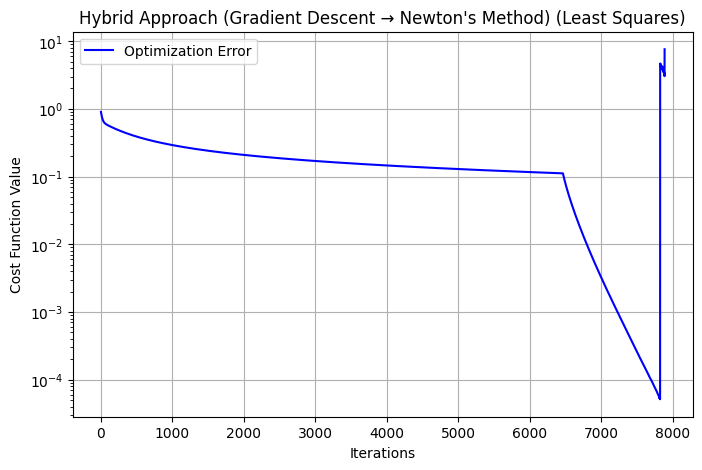

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_cost(w, X, y):
    m = len(y)
    predictions = X @ w
    return (1 / (2 * m)) * np.sum((y - predictions) ** 2)

def logistic_cost(w, X, y):
    m = len(y)
    predictions = 1 / (1 + np.exp(-X @ w))
    predictions = np.clip(predictions, 1e-6, 1 - 1e-6)  # Prevent log(0)
    return (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

def derivative(f, w, X, y):
    h = 1e-6
    grad = np.zeros_like(w)
    for i in range(len(w)):
        w_h = w.copy()
        w_h[i] += h
        grad[i] = (f(w_h, X, y) - f(w, X, y)) / h
    return grad

def GradientDescent(initial_w, f, X, y, learning_rate, tolr, maxITR):
    print("Starting Gradient Descent with initial guess:", initial_w)
    tolerance = tolr
    max_iterations = maxITR
    w = initial_w
    errors = []

    for i in range(max_iterations):
        grad = derivative(f, w, X, y)
        w = w - learning_rate * grad
        errors.append(f(w, X, y))  # Store cost at each iteration

        if np.linalg.norm(grad) < tolerance:
            print("Gradient Descent Converged after", i + 1, "iterations.")
            break
    
    print("Gradient Descent Final Error:", errors[-1])
    return w, errors

def newton_method(initial_w, f, X, y, maxITR):
    print("Starting Newton's Method with initial guess:", initial_w)
    tolerance = 1e-6
    max_iterations = maxITR
    w = initial_w
    errors = []

    for i in range(max_iterations):
        f_dash = derivative(f, w, X, y)
        print(f_dash)
        f_double_dash = np.eye(len(w)) * derivative(lambda w, X, y: np.sum(derivative(f, w, X, y)), w, X, y)
        print(f_double_dash)
        if np.linalg.det(f_double_dash) == 0:
            print("Error: Division by zero or singular Hessian.")
            #return None, errors
            break

        delta = np.linalg.inv(f_double_dash) @ f_dash
        w = w - delta
        errors.append(f(w, X, y))  # Store cost at each iteration

        if np.linalg.norm(delta) < tolerance:
            print("Newton's Method Converged after", i + 1, "iterations.")
            break

    print("Newton's Method Final Error:", errors[-1])
    print(f'errors=\n{errors}')
    return w, errors

def plot_error(errors, title):
    plt.figure(figsize=(8, 5))
    plt.semilogy(errors, label="Optimization Error", linestyle="-", color="b")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_error_semiog(errors, title):
    plt.figure(figsize=(8, 5))
    plt.semilogy(errors, label="Optimization Error", linestyle="-", color="b")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------- Least Squares Regression ---------------
print("------------Start optimization of Least Squares------------")
m = 20
X = np.random.rand(m, 1)
y = 3 * X.squeeze() + np.random.normal(0, 0.1, m)
X = np.c_[np.ones(m), X]  # Add bias term

# Gradient Descent Only
initial_w = np.ones(2)
initial_w, errors_gd_ls = GradientDescent(np.ones(2), least_squares_cost, X, y, learning_rate=0.3, tolr=1e-8, maxITR = 100000)
plot_error_semiog(errors_gd_ls, "Gradient Descent (Least Squares)")

# Newton's Method Only
initial_w = np.ones(2)
optimal_w_nm_ls, errors_nm_ls = newton_method(initial_w, least_squares_cost, X, y, maxITR=100000)
plot_error_semiog(errors_nm_ls, "Newton's Method (Least Squares)")

# Hybrid Approach (Gradient Descent → Newton's Method)
# Gradient Descent
initial_w, errors_gd_ls = GradientDescent(np.ones(2), least_squares_cost, X, y, learning_rate=0.05, tolr=1e-3, maxITR=10000)

# Newton's Method
optimal_w_ls, errors_nm_ls = newton_method(initial_w, least_squares_cost, X, y, maxITR=10000)
print("Optimal w (Least Squares):", optimal_w_ls)

# Combine errors in one curve
if errors_nm_ls:
    errors_gd_ls.extend(errors_nm_ls)

plot_error_semiog(errors_gd_ls, "Hybrid Approach (Gradient Descent → Newton's Method) (Least Squares)")
# ------------- Logistic Regression ---------------
print("----------Start optimization of Logistic Regression------------")
m = 20
X = np.random.rand(m, 1)
y = (X.squeeze() > 0.5).astype(int)  # Binary classification
X = np.c_[np.ones(m), X]  # Add bias term

# Gradient Descent Only
initial_w = np.ones(2)
initial_w, errors_gd_ls = GradientDescent(np.ones(2), logistic_cost, X, y, learning_rate=0.1, tolr=1e-6, maxITR = 100000)
plot_error_semiog(errors_gd_ls, "Gradient Descent (Least Squares)")

# Newton's Method Only
initial_w = np.ones(2)
optimal_w_nm_ls, errors_nm_ls = newton_method(initial_w, logistic_cost, X, y, maxITR=100000)
plot_error_semiog(errors_nm_ls, "Newton's Method (Least Squares)")

# Hybrid Approach (Gradient Descent → Newton's Method)
# Gradient Descent
initial_w, errors_gd_ls = GradientDescent(np.ones(2), logistic_cost, X, y, learning_rate=0.1, tolr=0.01, maxITR=10000)

# Newton's Method
optimal_w_ls, errors_nm_ls = newton_method(initial_w, logistic_cost, X, y, maxITR=10000)
print("Optimal w (Least Squares):", optimal_w_ls)

# Combine errors in one curve
if errors_nm_ls:
    errors_gd_ls.extend(errors_nm_ls)

plot_error_semiog(errors_gd_ls, "Hybrid Approach (Gradient Descent → Newton's Method) (Least Squares)")

------------Start optimization of Least Squares------------
Starting Gradient Descent with initial guess: [1. 1.]
Gradient Descent Converged after 1401 iterations.
Gradient Descent Final Error: 0.0027518963410323896


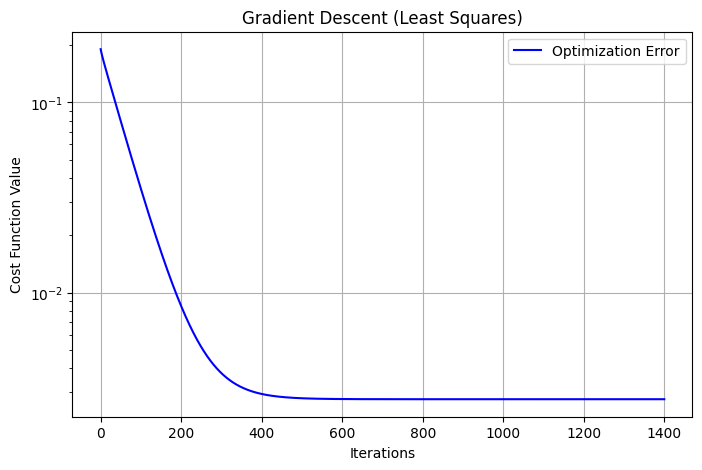

Starting Newton's Method with initial guess: [1. 1.]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_cost(w, X, y):
    m = len(y)
    predictions = X @ w
    return (1 / (2 * m)) * np.sum((y - predictions) ** 2)

def logistic_cost(w, X, y):
    m = len(y)
    predictions = 1 / (1 + np.exp(-X @ w))
    predictions = np.clip(predictions, 1e-6, 1 - 1e-6)  # Prevent log(0)
    return (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

def derivative(f, w, X, y):
    h = 1e-6
    grad = np.zeros_like(w)
    for i in range(len(w)):
        w_h = w.copy()
        w_h[i] += h
        grad[i] = (f(w_h, X, y) - f(w, X, y)) / h
    return grad

def GradientDescent(initial_w, f, X, y, learning_rate, tolr, maxITR):
    print("Starting Gradient Descent with initial guess:", initial_w)
    tolerance = tolr
    max_iterations = maxITR
    w = initial_w
    errors = []

    for i in range(max_iterations):
        grad = derivative(f, w, X, y)
        w = w - learning_rate * grad
        errors.append(f(w, X, y))  # Store cost at each iteration

        if np.linalg.norm(grad) < tolerance:
            print("Gradient Descent Converged after", i + 1, "iterations.")
            break
    
    print("Gradient Descent Final Error:", errors[-1])
    return w, errors

def newton_method(initial_w, f, X, y, maxITR, epsilon=1e-2):
    print("Starting Newton's Method with initial guess:", initial_w)
    tolerance = 1e-6
    max_iterations = maxITR
    w = initial_w
    errors = []

    for i in range(max_iterations):
        f_dash = derivative(f, w, X, y) + epsilon * X.T @ X  # Regularized gradient
        # Compute Hessian and add ε * I to it
        f_double_dash = np.eye(len(w)) * derivative(lambda w, X, y: np.sum(derivative(f, w, X, y)), w, X, y)
        f_double_dash += epsilon * np.eye(len(w))  # Adding small regularization term
        if np.linalg.det(f_double_dash) == 0:
            print("Error: Division by zero or singular Hessian.")
            break

        delta = np.linalg.inv(f_double_dash) @ f_dash
        w = w - delta
        errors.append(f(w, X, y))  # Store cost at each iteration

        if np.linalg.norm(delta) < tolerance:
            print("Newton's Method Converged after", i + 1, "iterations.")
            break

    print("Newton's Method Final Error:", errors[-1])
    print(f'errors=\n{errors}')
    return w, errors

def plot_error(errors, title):
    plt.figure(figsize=(8, 5))
    plt.semilogy(errors, label="Optimization Error", linestyle="-", color="b")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_error_semiog(errors, title):
    plt.figure(figsize=(8, 5))
    plt.semilogy(errors, label="Optimization Error", linestyle="-", color="b")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------- Least Squares Regression ---------------
print("------------Start optimization of Least Squares------------")
m = 20
X = np.random.rand(m, 1)
y = 3 * X.squeeze() + np.random.normal(0, 0.1, m)
X = np.c_[np.ones(m), X]  # Add bias term

# Gradient Descent Only
initial_w = np.ones(2)
initial_w, errors_gd_ls = GradientDescent(np.ones(2), least_squares_cost, X, y, learning_rate=0.1, tolr=1e-6, maxITR = 100000)
plot_error_semiog(errors_gd_ls, "Gradient Descent (Least Squares)")

# Newton's Method Only
initial_w = np.ones(2)
optimal_w_nm_ls, errors_nm_ls = newton_method(initial_w, least_squares_cost, X, y, maxITR=100000)
plot_error_semiog(errors_nm_ls, "Newton's Method (Least Squares)")

# Hybrid Approach (Gradient Descent → Newton's Method)
# Gradient Descent
initial_w, errors_gd_ls = GradientDescent(np.ones(2), least_squares_cost, X, y, learning_rate=0.05, tolr=1e-3, maxITR=10000)

# Newton's Method
optimal_w_ls, errors_nm_ls = newton_method(initial_w, least_squares_cost, X, y, maxITR=10000)
print("Optimal w (Least Squares):", optimal_w_ls)

# Combine errors in one curve
if errors_nm_ls:
    errors_gd_ls.extend(errors_nm_ls)

plot_error_semiog(errors_gd_ls, "Hybrid Approach (Gradient Descent → Newton's Method) (Least Squares)")
# ------------- Logistic Regression ---------------
print("----------Start optimization of Logistic Regression------------")
m = 20
X = np.random.rand(m, 1)
y = (X.squeeze() > 0.5).astype(int)  # Binary classification
X = np.c_[np.ones(m), X]  # Add bias term

# Gradient Descent Only
initial_w = np.ones(2)
initial_w, errors_gd_ls = GradientDescent(np.ones(2), logistic_cost, X, y, learning_rate=0.1, tolr=1e-6, maxITR = 100000)
plot_error_semiog(errors_gd_ls, "Gradient Descent (Least Squares)")

# Newton's Method Only
initial_w = np.ones(2)
optimal_w_nm_ls, errors_nm_ls = newton_method(initial_w, logistic_cost, X, y, maxITR=100000)
plot_error_semiog(errors_nm_ls, "Newton's Method (Least Squares)")

# Hybrid Approach (Gradient Descent → Newton's Method)
# Gradient Descent
initial_w, errors_gd_ls = GradientDescent(np.ones(2), logistic_cost, X, y, learning_rate=0.1, tolr=0.01, maxITR=10000)

# Newton's Method
optimal_w_ls, errors_nm_ls = newton_method(initial_w, logistic_cost, X, y, maxITR=10000)
print("Optimal w (Least Squares):", optimal_w_ls)

# Combine errors in one curve
if errors_nm_ls:
    errors_gd_ls.extend(errors_nm_ls)

plot_error_semiog(errors_gd_ls, "Hybrid Approach (Gradient Descent → Newton's Method) (Least Squares)")